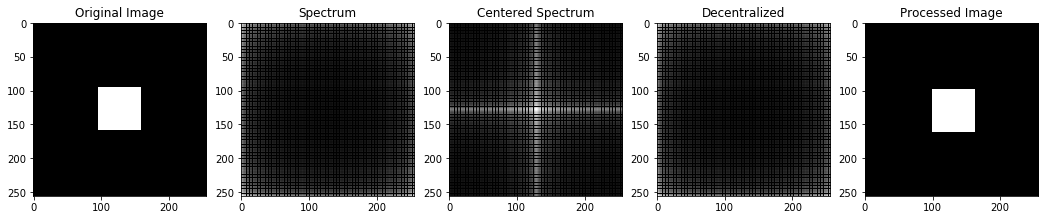

In [261]:
from skimage import draw 
import numpy as np
import matplotlib.pyplot as plt

img = np.zeros((256,256), dtype=np.uint8)
lowpass = np.zeros((256,256), dtype=np.uint8)
highpass = np.ones((256,256), dtype=np.uint8)
bandpass = np.zeros((256,256), dtype=np.uint8)

w=32 
#Create an image of a rectangle
start = (127-w, 127-w)
extent = (2*w, 2*w)
yy, xx = draw.rectangle(start, extent=extent) #real width 2*w+1
#yy, xx = draw.circle(128, 128, w) #this is a circle
img[yy, xx] = 1

filter_diameter=25
yy_f, xx_f = draw.circle(127, 127, filter_diameter)
lowpass[yy_f, xx_f] = 1 #lowpass filter, 1 in the circle, 0 around
highpass[yy_f, xx_f]= 0 #highpass filter, 0 in the circle, 1 around

start_diameter=32
end_diameter=64
for r in range(start_diameter,end_diameter):
    yy_f, xx_f = draw.circle_perimeter(127, 127, r)
    bandpass[yy_f,xx_f]=1 #bandpass filter, 1 in the band between start and end

plt.figure(figsize=(18,6), constrained_layout=False)

img_c1 = np.fft.fft2(img)
img_c2 = np.fft.fftshift(img_c2)
img_c3 = np.fft.ifftshift(img_c3)
img_c4 = np.fft.ifft2(img_c4)

plt.subplot(151), plt.imshow(img, "gray"), plt.title("Original Image")
plt.subplot(152), plt.imshow(np.log(1+np.abs(img_c1)), "gray"), plt.title("Spectrum")
plt.subplot(153), plt.imshow(np.log(1+np.abs(img_c2)), "gray"), plt.title("Centered Spectrum")
plt.subplot(154), plt.imshow(np.log(1+np.abs(img_c3)), "gray"), plt.title("Decentralized")
plt.subplot(155), plt.imshow(np.abs(img_c4), "gray"), plt.title("Processed Image")

plt.show()

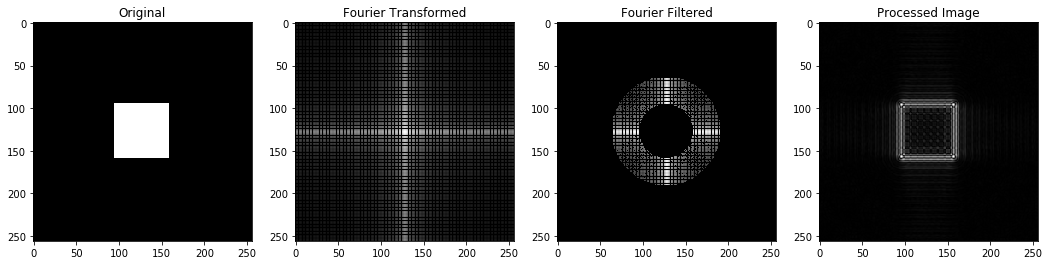

In [262]:
#Filtering is just a multiplication
plt.figure(figsize=(18,6), constrained_layout=False)

plt.subplot(141), plt.imshow(np.abs(img),"gray"), plt.title('Original')

fourier_transformed = np.fft.fftshift(np.fft.fft2(img))
plt.subplot(142), plt.imshow(np.log(1+np.abs(fourier_transformed)),'gray'), plt.title('Fourier Transformed')

fourier_filtered = fourier_transformed*bandpass

plt.subplot(143), plt.imshow(np.log(1+np.abs(fourier_filtered)),'gray'), plt.title('Fourier Filtered')

inverse_fourier_transformed = np.fft.ifft2(np.fft.ifftshift(fourier_filtered))

plt.subplot(144), plt.imshow(np.abs(inverse_fourier_transformed),"gray"), plt.title('Processed Image')
plt.show()

### Aufgabe
Versuchen sie das Bild eines Fingerabdrucks so gut es geht zu bearbeiten, so dass nur die Papillarleisten sichtbar bleiben. Benutzen Sie dazu die Fourierfilterung. Das erste Programm lädt den Fingerabdruck aus einer Datei. Das zweite (rück)tranformiert das Bild und wendet den Filter an.

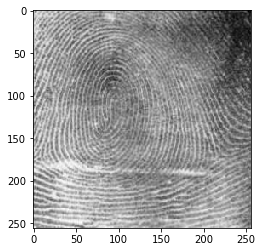

In [263]:
from skimage import io
from skimage.color import rgb2gray
from skimage.transform import resize

finger = io.imread('data/Fingerprint_Whorl.jpg')
finger = rgb2gray(finger)           #Umwandlung in ein Graustufenbild
finger = resize(finger, (256,256))  #Skalierung für die FFT 
plt.imshow(finger,"gray");

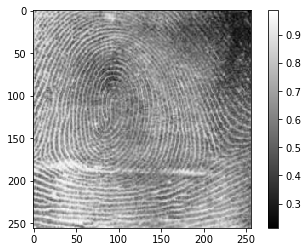

In [270]:
fourier_transformed = np.fft.fftshift(np.fft.fft2(finger))
fourier_filtered = fourier_transformed * np.ones((256,256)) #<- Here goes your filter
inverse_fourier_transformed = np.fft.ifft2(np.fft.ifftshift(fourier_filtered))
plt.imshow(np.abs(inverse_fourier_transformed),"gray")
plt.colorbar();